# 0) Importing necessary modules for the EDA and ML

In [17]:
import pandas as pd 
# pandas modules helps in DATA I/O from different file formats like *.csv or *.h5. It also helps in querying the data from MS SQL server
import numpy as np # helps in matrix and array operations
import matplotlib.pyplot as plt # helps in plotting
import seaborn as sns # A statistical plotting tool on top of matplotlib
import time # module for calculating elapsed time interval
# import pyodbc # module needed for odbc connection to the SQL server

In [18]:
%matplotlib inline

In [19]:
start=time.time() # Starting the stopwatch in the shell

# 1) Data I/O

** 2 ways to do DATA I/O **

1) Query the data from MS SQL server using pyodbc and pandas dataframe 'read_sql' query (currently NA in Linux)

2) Reading the data from stored csv files or H5 files from the local drive

## 1.1) Data I/O for LS 0D data

In [20]:
# Querying from SQL
#cnxn = pyodbc.connect("Driver={SQL Server};Server={S415VMMT543.DETSS.CORPINTRA.NET\\ECHO_POC};Database={RESERVOIR};Trusted_Connection=yes;UID={EMEA\\namanda}")
#data=pd.read_sql_query('SELECT VEHICLE_HASH,MILEAGE,LS_ID,LS_COUNTER FROM [RESERVOIR].[LS_ANALYSIS].[LS_UNION_0D] where MILEAGE IS NOT NULL',cnxn)

# Reading from CSV files or can H5 files
od_useful_cols=['VEHICLE_HASH','MILEAGE','LS_ID','LS_COUNTER'] # only these cols are needed 
data=pd.read_csv('LS_UNION_0D.csv',sep=';',header=0,encoding='latin-1',decimal=",",usecols=od_useful_cols) 
# latin-1 encoding while saving the csv file from SQL server management studio so the encoing must be specified
data.head()

,VEHICLE_HASH,MILEAGE,LS_ID,LS_COUNTER
0,CFF5F2A09644946F0BA2936D70A1732349AC1397,NaN,PROMISE LS 144,4234372
1,CFF5F2A09644946F0BA2936D70A1732349AC1397,NaN,PROMISE LS 122a,36351
2,CFF5F2A09644946F0BA2936D70A1732349AC1397,NaN,PROMISE LS 11,242134
3,CFF5F2A09644946F0BA2936D70A1732349AC1397,NaN,PROMISE LS 53,153
4,CFF5F2A09644946F0BA2936D70A1732349AC1397,NaN,PROMISE LS 85,15878325


In [21]:
data.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 938908 entries, 0 to 938907
Data columns (total 4 columns):
VEHICLE_HASH    938908 non-null object
MILEAGE         408094 non-null float64
LS_ID           938908 non-null object
LS_COUNTER      938908 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 28.7+ MB


In [22]:
data.describe()

,MILEAGE,LS_COUNTER
count,4.080940e+05,9.389080e+05
mean,3.901087e+06,3.383066e+06
std,1.921596e+08,1.597496e+07
min,1.527778e-02,1.000000e+00
25%,1.851587e+05,7.800000e+01
50%,5.117332e+05,5.520000e+03
75%,8.290636e+05,2.789158e+05
max,1.182456e+10,1.217484e+09


** Instead of removing the NULL MILEAGE rows where LS_COUNTERS are present may be we can Impute the values here **

# 1.2) Data I/O for LS 1D data

** In the Load Spectra 1D Table in database, the data is in terms of Histogram bins for a vehicle with the number of occurences of the Load collective in the respective bin. This is similar to frequency distribution over each load spectra. So inorder to use this there are 2 ways: **

1) To use Simple Correspondence Anaylsis and compress the data to a 2 dim compressed spectrum for each Load spectra

2) If all the data is to be used then histogram has to be converted to a cumulative distribution (currently not implemented) 

### 1.2.1) Data I/O from LS 1D compressed data

In [23]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_columns', None)


In [24]:
#data_pca=pd.read_csv('LS1d_ca.csv',delimiter=';')
#data_pca.head()
#print("PCA data for LS 1D read into the memory")


In [25]:
#print('The LS 1d Info: ',data_pca.shape)

### 1.2.2) CDF LS 1D data (NA yet)

### 1.2.3) Data I/O from MAPOS AFAB Table 

** This table will have inforamtion about workshop visit info and also has selective vehicle configuration information. It has the SEAG keys which are the targets for the ML problem ** 

In [26]:
# Reading from SQL server
#qry = "SELECT * FROM [RESERVOIR].[ROOT_CAUSE].[MAPOS_AFAB_JOIN] WHERE PRODUCTION_MONTH >= ? and AFAB_MODEL_RANGE = ?"
#y_data=pd.read_sql_query(sql=qry,con=cnxn,params = ['2015-01-01','963'])
#y_data.head()


# Reading from a csv file
y_data=pd.read_csv('MAPOS_AFAB_info.csv', sep=';',header=0,encoding='latin-1',decimal=",")
y_data.head()

/usr/local/anaconda3/5.0.0/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (0,1,5,6,7,9,10,17,22,25,26,27,28,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,47,49,50,51,52,53,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,VEHICLE_HASH,WORKSHOP_VISIT_HASH,MODEL_RANGE,MODEL,NDL,PRODDAT_MONTH,ERSTZUL_MONTH,REPDAT,LAUFLEISTG,SEAG,ART,S9,LOHN,MATGES,NK,GK,MOTBM,MOTKZ,MOTENDNR,FHSBM,REPGEB,TGA,BEF_W,REPCO,FAHRZEUGPRODNR,ABHLAND,ABHLFNR,ABHWERK,FZ_AUFBAUART,ARBEITSWERT,MOTOR_PRDAT,KZBEFUND_1,KB_BEAN_1,TEIL_BEAN_1,KB_BEFU_1,TEIL_BEFU_1,KZBEFUND_2,KB_BEAN_2,TEIL_BEAN_2,KB_BEFU_2,TEIL_BEFU_2,KZBEFUND_3,KB_BEAN_3,TEIL_BEAN_3,KB_BEFU_3,TEIL_BEFU_3,GETRBM_1,GETRKZ_1,GETRENDNR_1,GETRIEBE_PRDAT_1,GETRIEBE_EBDAT_1,GETRBM_2,GETRKZ_2,GETRENDNR_2,GETRIEBE_PRDAT_2,GETRIEBE_EBDAT_2,ACHSBAUMUSTER_1,ACHSENDNUMMER_1,ACHSPRODDATUM_1,ACHSBAUMUSTER_2,ACHSENDNUMMER_2,ACHSPRODDATUM_2,ACHSBAUMUSTER_3,ACHSENDNUMMER_3,ACHSPRODDATUM_3,ACHSBAUMUSTER_4,ACHSENDNUMMER_4,ACHSPRODDATUM_4,BAUREIHE,QUISDAT,GUTDAT,REPLAND,PROJ,G_TEIL_BEAN_1,G_TEIL_BEAN_2,G_TEIL_BEAN_3,G_TEIL_BEFU_1,G_TEIL_BEFU_2,G_TEIL_BEFU_3,ACHSKBNUMMER_1,ACHSKBNUMMER_2,ACHSKBNUMMER_3,ACHSKBNUMMER_4,LB_KENNZEICHEN,SSL_VERURSACHER,BEFU_SSL,BEFU_SA,BEFU_AGGR,AFAB_VEHICLE_HASH,AFAB_MODEL_RANGE,AFAB_MODEL,SALES_AREA,OPERATION_AREA,COUNTRY,SUB_REGION,REGION,ORDER_MONTH,ORDER_YEAR,ASSEMBLY,DELIVERY_MONTH,DELIVERY_YEAR,PRODUCTION_MONTH,PRODUCTION_YEAR,PRODUCTION_PLANT,MOUNTING_DESCRIPTION,BODY_DESCRIPTION,BRANCH_DESCRIPTION,BODY_VEHICLE_BODY_PREPARATION,BRAKE_SYSTEM_DISC_DRUM_BRAKE_SYSTEM,BRAKE_SYSTEM_SERVICE_BRAKE_SYSTEM,CAB_CONFIGURATION_CAB_SETUP_HEIGHT,CAB_CONFIGURATION_FLOOR,CAB_CONFIGURATION_LENGTH,CAB_CONFIGURATION_ROOF,CAB_CONFIGURATION_SUSPENSION,CAB_CONFIGURATION_VERSION,CAB_CONFIGURATION_WIDTH,CHASSIS_FRONT_AXLE,CHASSIS_FRONT_AXLE_OFFSET,CHASSIS_FRONT_SUSPENSION,CHASSIS_LEADING_AXLE,CHASSIS_REAR_AXLE,CHASSIS_REAR_CLOSING_CROSSMEMBER,CHASSIS_REAR_CLOSING_CROSSMEMBER_INDENTED,CHASSIS_REAR_SUSPENSION,CHASSIS_TRAILING_AXLE,ELECTRICS_BATTERY,EXHAUST_SYSTEM_EMISSION_STAGE,EXHAUST_SYSTEM_MUFFLER,FIFTH_WHEEL_COUPLING,FIFTH_WHEEL_COUPLING_HEIGHT,FIFTH_WHEEL_COUPLING_LEAD,FUEL_SYSTEM_ADBLUE_TANK,FUEL_SYSTEM_AUXILIARY_TANK,FUEL_SYSTEM_HYDRAULIC_OIL_TANK,FUEL_SYSTEM_LAYOUT,FUEL_SYSTEM_MAIN_FUEL_TANK,POWERTRAIN_AXLE_RATIO,POWERTRAIN_ENGINE_POWER_RATING,POWERTRAIN_ENGINE_SERIES,POWERTRAIN_TRANSFER_CASE,POWERTRAIN_TRANSMISSION,PRODUCTION_LOCATION_VEHICLE,PTO_ENGINE_PTO_FRONT,PTO_ENGINE_PTO_REAR,PTO_TRANSMISSION,PTO_TRANSMISSION_INDEPENDENT,SERIES_MODEL_TYPE,SERIES_NAME,SERIES_PRODUCT_GROUP,TRAILER_COUPLING,VEHICLE_CONFIGURATION_AIR_INTAKE,VEHICLE_CONFIGURATION_AXLE_FORMULA,VEHICLE_CONFIGURATION_BATTERY_MOUNTING_TYPE,VEHICLE_CONFIGURATION_FRAME_OVERHANG,VEHICLE_CONFIGURATION_INSTALLATION_SPACE_CHASSIS_MOUNTING,VEHICLE_CONFIGURATION_SPARE_WHEEL_MOUNTING,VEHICLE_CONFIGURATION_SUSPENSION_TYPE_REAR_AXLE,VEHICLE_CONFIGURATION_TONNAGE,VEHICLE_CONFIGURATION_VEHICLE_BODY_VEHICLE_APPLICATION,VEHICLE_CONFIGURATION_WEIGHT_VARIANT,VEHICLE_CONFIGURATION_WHEELBASE,WHEELS_RIMS_FA,WHEELS_RIMS_FA_RA,WHEELS_RIMS_LA,WHEELS_RIMS_RA,WHEELS_RIMS_TA,WHEELS_TIRES_FA_LA_TA,WHEELS_TIRES_FA_LA_TA_HIGH_AXLE_LOAD,WHEELS_TIRES_RA,WHEELS_TIRES_TA
0,D07CDA3D428DAB5AF7FA96D426CE7CDE9A14344A,8F36CE836B093E4C1623B171D66ACEF63783311B,963.0,963403.0,233.0,2015-04-01,2015-04-01,2015-11-26,61090.0,5350R,EF,8.0,121.04,0.0,0.0,121.04,471900.0,C0,151870.0,960840.0,24801.0,0.0,,130382.0,1616112.0,,,,,14.0,2015-04-10,,,,,,,,,,,,,,,,715352.0,1,578749.0,2015-04-10,2015-04-10,,,,NaN,NaN,739528,722733,2015-04-10,,,NaN,746301,702873,2015-04-10,,,NaN,SFTP-FERN,2015-12-01,2015-12-04,248.0,D,,,,,,,F,,M,,Z,,,,,D07CDA3D428DAB5AF7FA96D426CE7CDE9A14344A,963,963403,233: Bremen,233: Bremen,Germany,Western Europe,Europe,2015-02-01,2015,CB,2015-04-01,2015.0,2015-04-01,2015,0600 Wörth,<missing>,OLD - Miscellaneous,<missing>,<missing>,B2A: DISC BRAKES ON FRONT AND REAR AXLE,B1B: ELECTRONIC BRAKING SYSTEM WITH ABS AND ASR,"F2P: CAB, 765 MM ATTACHMENT HEIGHT","F2A: FLOOR VARIANT, FLAT FLOOR",F1R: L-CAB,F2V: BIGSPACE,"F3B: CAB MOUNTINGS, COMFORT, STEEL-SPRUNG","F1H: L-CAB BIGSPACE, 2.50 M, LEVEL FLOOR",F2H: CAB WIDTH 2.50 M,A1C: FRONT AXLE 7.5 T,"A1Z: FRONT AXLE, OFFSET VERSION","Q1S: FRONT 

# 2) Data Preprocessing & Preparation

## 2.0) Imputing the MILEAGE column (comment this cell if needed)

In [27]:
from sklearn.preprocessing import Imputer
imp=Imputer(missing_values='NaN',strategy='mean',axis=0)
data['MILEAGE']=imp.fit_transform(data[['MILEAGE']]).ravel()

In [28]:
data.head()

,VEHICLE_HASH,MILEAGE,LS_ID,LS_COUNTER
0,CFF5F2A09644946F0BA2936D70A1732349AC1397,3.901087e+06,PROMISE LS 144,4234372
1,CFF5F2A09644946F0BA2936D70A1732349AC1397,3.901087e+06,PROMISE LS 122a,36351
2,CFF5F2A09644946F0BA2936D70A1732349AC1397,3.901087e+06,PROMISE LS 11,242134
3,CFF5F2A09644946F0BA2936D70A1732349AC1397,3.901087e+06,PROMISE LS 53,153
4,CFF5F2A09644946F0BA2936D70A1732349AC1397,3.901087e+06,PROMISE LS 85,15878325


## 2.1) Data Preprocessing for LS 0D data

** The data preprocessing for LS0D has to be done inorder to convert the data into a tabular format with one vehicle per row and its corresponding load spectra values normalized by Mileage will be in the columns **

In [29]:
print('Pre Processing Started for LS 0D')
print('The LS 0D Info: ',data.shape)
print('-----------------------------------------------------------------------------------------------------------------')

m_ls_cols=(data['LS_ID'].unique())
print('The Unique LS0D IDs are: ', m_ls_cols)
print('\n The number of unique LS0D IDs are: ',len(m_ls_cols))


print('-----------------------------------------------------------------------------------------------------------------')

# converting the counters to LS events per kilometer := this is done to standardize the data
data['LS_EVENTS_PER_KM']=data['LS_COUNTER']/data['MILEAGE']



display(data.head())
data=data.drop(['LS_COUNTER','MILEAGE'],axis=1)

print('-----------------------------------------------------------------------------------------------------------')

# now the crosstabbing has to be done inorder to create a table with one row corresponding to one vehicle and the columns corresponding to differen load spectras
df_processed = pd.crosstab(index=data['VEHICLE_HASH'],columns=data['LS_ID'],values=data['LS_EVENTS_PER_KM'],aggfunc=np.mean)
df_processed = df_processed.reset_index().fillna(0)

#(df_processed.head())

print('-----------------------------------------------------------------------------------------------------------')
print('The preprocessed data for LS 0D data is of shape:',df_processed.shape)


print('-----------------------------------------------------------------------------------------------------------')
# renaming the Vehicle Hash column because these hashes are actually AFAB hashes
df_processed=df_processed.rename(columns={"VEHICLE_HASH": "AFAB_VEHICLE_HASH"})


print('------------------------------------------------------------------------------------------------------------')

df_processed.info()


print('------------------------------------------------------------------------------------------------------------')
del data # deleting the original dataframe inorder to save RAM 

Pre Processing Started for LS 0D
The LS 0D Info:  (938908, 4)
-----------------------------------------------------------------------------------------------------------------
The Unique LS0D IDs are:  ['PROMISE LS 144' 'PROMISE LS 122a' 'PROMISE LS 11' 'PROMISE LS 53'
 'PROMISE LS 85' 'PROMISE LS 17' 'PROMISE LS 89' 'PROMISE LS 2'
 'PROMISE LS 59' 'PROMISE LS 82' 'PROMISE LS 101' 'PROMISE LS 4'
 'PROMISE LS 31' 'PROMISE LS 10' 'PROMISE LS 30' 'PROMISE LS 33'
 'PROMISE LS 100' 'PROMISE LS 123' 'PROMISE LS 102' 'PROMISE LS 123a'
 'PROMISE LS 102a' 'PROMISE LS 52' 'ECHO LS 178' 'ECHO LS 89' 'ECHO LS 2'
 'ECHO LS 4']

 The number of unique LS0D IDs are:  26
-----------------------------------------------------------------------------------------------------------------
                               VEHICLE_HASH       MILEAGE            LS_ID  \
0  CFF5F2A09644946F0BA2936D70A1732349AC1397  3.901087e+06   PROMISE LS 144   
1  CFF5F2A09644946F0BA2936D70A1732349AC1397  3.901087e+06  PROMISE 

## 2.2) Data Preprocessing for LS1D data

** Currently not Available **

** LS 1D compressed data does not require any preprocessing **

## 2.3) Data preprocessing for MAPOS AFAB data

In [30]:
y_cols=list(y_data.columns) # obtaining all the column names available in the MAPOS AFAB table

print('The columns available are: ',y_cols)


The columns available are:  ['VEHICLE_HASH', 'WORKSHOP_VISIT_HASH', 'MODEL_RANGE', 'MODEL', 'NDL', 'PRODDAT_MONTH', 'ERSTZUL_MONTH', 'REPDAT', 'LAUFLEISTG', 'SEAG', 'ART', 'S9', 'LOHN', 'MATGES', 'NK', 'GK', 'MOTBM', 'MOTKZ', 'MOTENDNR', 'FHSBM', 'REPGEB', 'TGA', 'BEF_W', 'REPCO', 'FAHRZEUGPRODNR', 'ABHLAND', 'ABHLFNR', 'ABHWERK', 'FZ_AUFBAUART', 'ARBEITSWERT', 'MOTOR_PRDAT', 'KZBEFUND_1', 'KB_BEAN_1', 'TEIL_BEAN_1', 'KB_BEFU_1', 'TEIL_BEFU_1', 'KZBEFUND_2', 'KB_BEAN_2', 'TEIL_BEAN_2', 'KB_BEFU_2', 'TEIL_BEFU_2', 'KZBEFUND_3', 'KB_BEAN_3', 'TEIL_BEAN_3', 'KB_BEFU_3', 'TEIL_BEFU_3', 'GETRBM_1', 'GETRKZ_1', 'GETRENDNR_1', 'GETRIEBE_PRDAT_1', 'GETRIEBE_EBDAT_1', 'GETRBM_2', 'GETRKZ_2', 'GETRENDNR_2', 'GETRIEBE_PRDAT_2', 'GETRIEBE_EBDAT_2', 'ACHSBAUMUSTER_1', 'ACHSENDNUMMER_1', 'ACHSPRODDATUM_1', 'ACHSBAUMUSTER_2', 'ACHSENDNUMMER_2', 'ACHSPRODDATUM_2', 'ACHSBAUMUSTER_3', 'ACHSENDNUMMER_3', 'ACHSPRODDATUM_3', 'ACHSBAUMUSTER_4', 'ACHSENDNUMMER_4', 'ACHSPRODDATUM_4', 'BAUREIHE', 'QUISDAT', 'G

** Only some columns are chosen from the MAPOS AFAB JOIN Table: inorder to make the analysis simpler **

In [31]:
# Columns of interest from the table # remaining columns discarded for this analysis

useful_cols=['VEHICLE_HASH','WORKSHOP_VISIT_HASH','MODEL','PRODDAT_MONTH','REPDAT','LAUFLEISTG','SEAG','ART','AFAB_VEHICLE_HASH','COUNTRY','PRODUCTION_PLANT','MOUNTING_DESCRIPTION','BODY_DESCRIPTION','BRANCH_DESCRIPTION',
'BODY_VEHICLE_BODY_PREPARATION','BRAKE_SYSTEM_DISC_DRUM_BRAKE_SYSTEM','BRAKE_SYSTEM_SERVICE_BRAKE_SYSTEM','CAB_CONFIGURATION_CAB_SETUP_HEIGHT','CAB_CONFIGURATION_FLOOR','CAB_CONFIGURATION_LENGTH','CAB_CONFIGURATION_ROOF','CAB_CONFIGURATION_SUSPENSION','CAB_CONFIGURATION_VERSION','CAB_CONFIGURATION_WIDTH','CHASSIS_FRONT_AXLE',
'CHASSIS_FRONT_AXLE_OFFSET',
'CHASSIS_FRONT_SUSPENSION',
'CHASSIS_LEADING_AXLE',
'CHASSIS_REAR_AXLE',
'CHASSIS_REAR_CLOSING_CROSSMEMBER',
'CHASSIS_REAR_CLOSING_CROSSMEMBER_INDENTED',
'CHASSIS_REAR_SUSPENSION',
'CHASSIS_TRAILING_AXLE',
'ELECTRICS_BATTERY',
'EXHAUST_SYSTEM_EMISSION_STAGE',
'EXHAUST_SYSTEM_MUFFLER',
'FIFTH_WHEEL_COUPLING',
'FIFTH_WHEEL_COUPLING_HEIGHT',
'FIFTH_WHEEL_COUPLING_LEAD',
'FUEL_SYSTEM_ADBLUE_TANK',
'FUEL_SYSTEM_AUXILIARY_TANK',
'FUEL_SYSTEM_HYDRAULIC_OIL_TANK','FUEL_SYSTEM_LAYOUT',
'FUEL_SYSTEM_MAIN_FUEL_TANK',
'POWERTRAIN_AXLE_RATIO',
'POWERTRAIN_ENGINE_POWER_RATING',
'POWERTRAIN_ENGINE_SERIES',
'POWERTRAIN_TRANSFER_CASE',
'POWERTRAIN_TRANSMISSION',
'PRODUCTION_LOCATION_VEHICLE',
'PTO_ENGINE_PTO_FRONT',
'PTO_ENGINE_PTO_REAR',
'PTO_TRANSMISSION',
'PTO_TRANSMISSION_INDEPENDENT',
'TRAILER_COUPLING',
'VEHICLE_CONFIGURATION_AIR_INTAKE',
'VEHICLE_CONFIGURATION_AXLE_FORMULA',
'VEHICLE_CONFIGURATION_BATTERY_MOUNTING_TYPE',
'VEHICLE_CONFIGURATION_FRAME_OVERHANG',
'VEHICLE_CONFIGURATION_INSTALLATION_SPACE_CHASSIS_MOUNTING',
'VEHICLE_CONFIGURATION_SPARE_WHEEL_MOUNTING',
'VEHICLE_CONFIGURATION_SUSPENSION_TYPE_REAR_AXLE',
'VEHICLE_CONFIGURATION_TONNAGE',
'VEHICLE_CONFIGURATION_VEHICLE_BODY_VEHICLE_APPLICATION',
'VEHICLE_CONFIGURATION_WEIGHT_VARIANT',
'VEHICLE_CONFIGURATION_WHEELBASE']

In [32]:
y_data=y_data[useful_cols]
print('-------------------------------------SUMMARY------------------------------------------------------------')

print('The Number of AFAB Vehicles Selected: ',len(y_data['AFAB_VEHICLE_HASH'].unique()))
print('The Number of AQUA Vehicles Selected: ',len(y_data['VEHICLE_HASH'].unique()))
print('The Number of Workshop Visits Available: ',len(y_data['WORKSHOP_VISIT_HASH'].unique()))

print('--------------------------------------------------------------------------------------------------------')


-------------------------------------SUMMARY------------------------------------------------------------
The Number of AFAB Vehicles Selected:  127005
The Number of AQUA Vehicles Selected:  86530
The Number of Workshop Visits Available:  242850
--------------------------------------------------------------------------------------------------------


## 2.4) Data Preparation for the ML algorithms

### 2.4.1) Merging different dataframes

In [33]:
# Merging the dataframes MAPOS_AFAB_TABLE by left outer joined with LS_0D data on AFAB_VEHICLE_HASH

y_data_combined=pd.merge(y_data,df_processed, on='AFAB_VEHICLE_HASH', how='left')
y_data_combined.head(10)

# Merging the dataframes data_combined tabe by left outer joined with LS_1D CA data on AFAB_VEHICLE_HASH

#y_data_combined=pd.merge(y_data,data_pca,on='AFAB_VEHICLE_HASH',how='left')

,VEHICLE_HASH,WORKSHOP_VISIT_HASH,MODEL,PRODDAT_MONTH,REPDAT,LAUFLEISTG,SEAG,ART,AFAB_VEHICLE_HASH,COUNTRY,PRODUCTION_PLANT,MOUNTING_DESCRIPTION,BODY_DESCRIPTION,BRANCH_DESCRIPTION,BODY_VEHICLE_BODY_PREPARATION,BRAKE_SYSTEM_DISC_DRUM_BRAKE_SYSTEM,BRAKE_SYSTEM_SERVICE_BRAKE_SYSTEM,CAB_CONFIGURATION_CAB_SETUP_HEIGHT,CAB_CONFIGURATION_FLOOR,CAB_CONFIGURATION_LENGTH,CAB_CONFIGURATION_ROOF,CAB_CONFIGURATION_SUSPENSION,CAB_CONFIGURATION_VERSION,CAB_CONFIGURATION_WIDTH,CHASSIS_FRONT_AXLE,CHASSIS_FRONT_AXLE_OFFSET,CHASSIS_FRONT_SUSPENSION,CHASSIS_LEADING_AXLE,CHASSIS_REAR_AXLE,CHASSIS_REAR_CLOSING_CROSSMEMBER,CHASSIS_REAR_CLOSING_CROSSMEMBER_INDENTED,CHASSIS_REAR_SUSPENSION,CHASSIS_TRAILING_AXLE,ELECTRICS_BATTERY,EXHAUST_SYSTEM_EMISSION_STAGE,EXHAUST_SYSTEM_MUFFLER,FIFTH_WHEEL_COUPLING,FIFTH_WHEEL_COUPLING_HEIGHT,FIFTH_WHEEL_COUPLING_LEAD,FUEL_SYSTEM_ADBLUE_TANK,FUEL_SYSTEM_AUXILIARY_TANK,FUEL_SYSTEM_HYDRAULIC_OIL_TANK,FUEL_SYSTEM_LAYOUT,FUEL_SYSTEM_MAIN_FUEL_TANK,POWERTRAIN_AXLE_RATIO,POWERTRAIN_ENGINE_POWER_RATING,POWERTRAIN_ENGINE_SERIES,POWERTRAIN_TRANSFER_CASE,POWERTRAIN_TRANSMISSION,PRODUCTION_LOCATION_VEHICLE,PTO_ENGINE_PTO_FRONT,PTO_ENGINE_PTO_REAR,PTO_TRANSMISSION,PTO_TRANSMISSION_INDEPENDENT,TRAILER_COUPLING,VEHICLE_CONFIGURATION_AIR_INTAKE,VEHICLE_CONFIGURATION_AXLE_FORMULA,VEHICLE_CONFIGURATION_BATTERY_MOUNTING_TYPE,VEHICLE_CONFIGURATION_FRAME_OVERHANG,VEHICLE_CONFIGURATION_INSTALLATION_SPACE_CHASSIS_MOUNTING,VEHICLE_CONFIGURATION_SPARE_WHEEL_MOUNTING,VEHICLE_CONFIGURATION_SUSPENSION_TYPE_REAR_AXLE,VEHICLE_CONFIGURATION_TONNAGE,VEHICLE_CONFIGURATION_VEHICLE_BODY_VEHICLE_APPLICATION,VEHICLE_CONFIGURATION_WEIGHT_VARIANT,VEHICLE_CONFIGURATION_WHEELBASE,ECHO LS 178,ECHO LS 2,ECHO LS 4,ECHO LS 89,PROMISE LS 10,PROMISE LS 100,PROMISE LS 101,PROMISE LS 102,PROMISE LS 102a,PROMISE LS 11,PROMISE LS 122a,PROMISE LS 123,PROMISE LS 123a,PROMISE LS 144,PROMISE LS 17,PROMISE LS 2,PROMISE LS 30,PROMISE LS 31,PROMISE LS 33,PROMISE LS 4,PROMISE LS 52,PROMISE LS 53,PROMISE LS 59,PROMISE LS 82,PROMISE LS 85,PROMISE LS 89
0,D07CDA3D428DAB5AF7FA96D426CE7CDE9A14344A,8F36CE836B093E4C1623B171D66ACEF63783311B,963403.0,2015-04-01,2015-11-26,61090.0,5350R,EF,D07CDA3D428DAB5AF7FA96D426CE7CDE9A14344A,Germany,0600 Wörth,<missing>,OLD - Miscellaneous,<missing>,<missing>,B2A: DISC BRAKES ON FRONT AND REAR AXLE,B1B: ELECTRONIC BRAKING SYSTEM WITH ABS AND ASR,"F2P: CAB, 765 MM ATTACHMENT HEIGHT","F2A: FLOOR VARIANT, FLAT FLOOR",F1R: L-CAB,F2V: BIGSPACE,"F3B: CAB MOUNTINGS, COMFORT, STEEL-SPRUNG","F1H: L-CAB BIGSPACE, 2.50 M, LEVEL FLOOR",F2H: CAB WIDTH 2.50 M,A1C: FRONT AXLE 7.5 T,"A1Z: FRONT AXLE, OFFSET VERSION","Q1S: FRONT SPRING, 7.5 T, 2-LEAF",<missing>,"A2E: REAR AXLE, CROWN WHEEL 440, HYPOID, 13.0 T",<missing>,<missing>,<missing>,<missing>,"E1C: BATTERIES 2 X 12 V/220 AH, LOW-MAINTENANCE","M5Z: ENGINE VERSION, EURO VI","K7B: EXHAUST SYST., OUTLET DOWNWARDS, FANS OUT...","Q5R: FIFTH WHEEL COUPLING, STANDARD, JOST JSK 42",Q4I: FIFTH WHEEL COUPLING HEIGHT = 150 MM,H2C: FIFTH-WHEEL LEAD +600 MM,<missing>,"K6U: SECOND TANK, 480 L, RIGHT,735 X 700 X 110...",<missing>,"K0T: MAIN TANK, LEFT","K2B: TANK,820L+90L ADBLUE,LEFT,735X700X2170 AL...",A5H: AXLE RATIO I = 2.611,"M3B: ENG. OM471,INLINE 6, 12.8 L, 330KW (449HP...",Z5E: OM 471,<missing>,G2B: TRANSMISSION G 211-12/14.93-1.0,I6I: VEHICLE PRODUCTION PLANT WOERTH,<missing>,<missing>,<missing>,<missing>,<missing>,"M8B: AIR INTAKE BEHIND CAB, MOUNTED",I4A: WHEEL ARRANGEMENT 4X2,C7T: INTEGRAL REAR END,C0G: FRAME OVERHANG 1050 MM,<missing>,"R8F: SPARE WHEEL CARRIER, PROVISIONAL","I6X: AIR SUSPENSION, REAR AXLE",I5A: 18.0-TONNER,<missing>,W9Z: WEIGHT VARIANT 18.0 T (7.5/11.5),C1W: WHEELBASE 3700 MM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,B87BB0B5FFD8FE38400F87D651E82499ECFB2ED4,03FA502CF0B377E7F7908475397D88EBB779DAB5,963403.0,2015-04-01,2016-04-06,153891.0,59137,74,B87BB0B5FFD8FE38400F87D651E82499ECFB2ED4,Germany,0600 Wörth,<missing>,OLD - Miscel

In [34]:
y_data_combined.info(verbose=True,null_counts=True) # this has now ls 0D and ls 1D CA and all vehicle info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 571387 entries, 0 to 571386
Data columns (total 92 columns):
VEHICLE_HASH                                                 502580 non-null object
WORKSHOP_VISIT_HASH                                          502580 non-null object
MODEL                                                        502580 non-null float64
PRODDAT_MONTH                                                502580 non-null object
REPDAT                                                       502580 non-null object
LAUFLEISTG                                                   502580 non-null float64
SEAG                                                         502580 non-null object
ART                                                          502580 non-null object
AFAB_VEHICLE_HASH                                            571387 non-null object
COUNTRY                                                      571386 non-null object
PRODUCTION_PLANT                               

In [35]:
print('The size of the merged table : ', y_data_combined.shape)

The size of the merged table :  (571387, 92)


In [36]:
del y_data # delete the original MAPOS AFAB Table

### 2.4.2) Cleaning the new merged tables

In [37]:
y_data_combined_AFAB=y_data_combined[~y_data_combined.VEHICLE_HASH.isnull()] # remove the rows with NAN values for vehicle hash # not required for analysis

y_data_combined_AFAB=y_data_combined_AFAB[~y_data_combined_AFAB.AFAB_VEHICLE_HASH.isnull()] # remove the rows with NAN values for AFAB vehicle hash # these vehicles are not produced

In [38]:
y_data_combined_AFAB.info(verbose=True,null_counts=True)



del y_data_combined # delete the original combined table 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 502580 entries, 0 to 561043
Data columns (total 92 columns):
VEHICLE_HASH                                                 502580 non-null object
WORKSHOP_VISIT_HASH                                          502580 non-null object
MODEL                                                        502580 non-null float64
PRODDAT_MONTH                                                502580 non-null object
REPDAT                                                       502580 non-null object
LAUFLEISTG                                                   502580 non-null float64
SEAG                                                         502580 non-null object
ART                                                          502580 non-null object
AFAB_VEHICLE_HASH                                            502580 non-null object
COUNTRY                                                      502580 non-null object
PRODUCTION_PLANT                               

In [39]:
print('The size of the merged table after cleaning and before removing duplicates: ', y_data_combined_AFAB.shape)

The size of the merged table after cleaning and before removing duplicates:  (502580, 92)


In [40]:
print('-------------------------------------SUMMARY Check after merging------------------------------------')

print('The Number of AFAB Vehicles Selected from the merged table: ',len(y_data_combined_AFAB['AFAB_VEHICLE_HASH'].unique()))
print('The Number of AQUA Vehicles Selected from the merged table: ',len(y_data_combined_AFAB['VEHICLE_HASH'].unique()))
print('The Number of Workshop Visits Available from the merged table: ',len(y_data_combined_AFAB['WORKSHOP_VISIT_HASH'].unique()))

print('-----------------------------------------------------------------------------------------------------')


-------------------------------------SUMMARY Check after merging------------------------------------
The Number of AFAB Vehicles Selected from the merged table:  86529
The Number of AQUA Vehicles Selected from the merged table:  86529
The Number of Workshop Visits Available from the merged table:  242849
-----------------------------------------------------------------------------------------------------


In [41]:
y_data_combined_AFAB['SEAG'].isnull().sum() # generally checked but should be checked in conjunction with VEHICLE_HASH

0

In [42]:
# removing duplicates if any
y_data_combined_AFAB_damaged=y_data_combined_AFAB.drop_duplicates(subset=['AFAB_VEHICLE_HASH','WORKSHOP_VISIT_HASH','LAUFLEISTG','REPDAT','SEAG','ART'])#,keep='last'

In [43]:
print('-------------------------------------SUMMARY Check after removing duplicates--------------------------------')

print('The Number of AFAB Vehicles Selected from the merged table: ',len(y_data_combined_AFAB_damaged['AFAB_VEHICLE_HASH'].unique()))
print('The Number of AQUA Vehicles Selected from the merged table: ',len(y_data_combined_AFAB_damaged['VEHICLE_HASH'].unique()))
print('The Number of Workshop Visits Available from the merged table: ',len(y_data_combined_AFAB_damaged['WORKSHOP_VISIT_HASH'].unique()))

print('-------------------------------------------------------------------------------------------------------------')


-------------------------------------SUMMARY Check after removing duplicates--------------------------------
The Number of AFAB Vehicles Selected from the merged table:  86529
The Number of AQUA Vehicles Selected from the merged table:  86529
The Number of Workshop Visits Available from the merged table:  242849
-------------------------------------------------------------------------------------------------------------


In [44]:
del y_data_combined_AFAB # delete the original merged table after removing null afab hashes if any

print('The size of the feature matrix after all the preprocessing: ',y_data_combined_AFAB_damaged.shape)

The size of the feature matrix after all the preprocessing:  (330114, 92)


In [45]:
# locating the target related vehicles and storing them in a different dataframe
mask = ((y_data_combined_AFAB_damaged['SEAG']== '1420F'))
y_data_c_SEAG = y_data_combined_AFAB_damaged.loc[mask]
mask1 = ((y_data_c_SEAG['ART']== 'B2'))
y_data_c_FMODE = y_data_c_SEAG.loc[mask1]

#

print('-------------------------------------SUMMARY Check for SEAG KEY 1420F------------------------------------')

print('The Number of AFAB Vehicles Selected which has damage 1420F: ',len(y_data_c_FMODE['AFAB_VEHICLE_HASH'].unique()))
print('The Number of AQUA Vehicles Selected which has damage 1420F: ',len(y_data_c_FMODE['VEHICLE_HASH'].unique()))
print('The Number of Workshop Visits Available which has damage 1420F: ',len(y_data_c_FMODE['WORKSHOP_VISIT_HASH'].unique()))

print('----------------------------------------------------------------------------------------------------------')

print('Any NULL Mileage Values: ',y_data_c_FMODE['LAUFLEISTG'].isnull().sum())


print('The damage vehicles dataframe size: ',y_data_c_FMODE.shape)


-------------------------------------SUMMARY Check for SEAG KEY 1420F------------------------------------
The Number of AFAB Vehicles Selected which has damage 1420F:  2186
The Number of AQUA Vehicles Selected which has damage 1420F:  2186
The Number of Workshop Visits Available which has damage 1420F:  3185
----------------------------------------------------------------------------------------------------------
Any NULL Mileage Values:  0
The damage vehicles dataframe size:  (3189, 92)


In [46]:
y_data_c_FMODE['DAMAGE']=1 # assigning damage variable 1 to the target damaged vehicles

/usr/local/anaconda3/5.0.0/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [47]:
mask = ((y_data_combined_AFAB_damaged['SEAG']!= '1420F'))
y_data_n_SEAG = y_data_combined_AFAB_damaged.loc[mask]
mask1 = ((y_data_n_SEAG['ART']!= 'B2'))
y_data_n_FMODE = y_data_n_SEAG.loc[mask1]


print('-------------------------------------SUMMARY Check for all the other SEAG keys------------------------------')

print('The Number of AFAB Vehicles Selected which donot have damage 1420F: ',len(y_data_n_FMODE['AFAB_VEHICLE_HASH'].unique()))
print('The Number of AQUA Vehicles Selected which donot have damage 1420F: ',len(y_data_n_FMODE['VEHICLE_HASH'].unique()))
print('The Number of Workshop Visits Available which donot have damage 1420F: ',len(y_data_n_FMODE['WORKSHOP_VISIT_HASH'].unique()))

print('------------------------------------------------------------------------------------------------------------')

print('Any NULL Mileage Values: ',y_data_n_FMODE['LAUFLEISTG'].isnull().sum())


print('The damage vehicles dataframe size: ',y_data_n_FMODE.shape)


-------------------------------------SUMMARY Check for all the other SEAG keys------------------------------
The Number of AFAB Vehicles Selected which donot have damage 1420F:  86454
The Number of AQUA Vehicles Selected which donot have damage 1420F:  86454
The Number of Workshop Visits Available which donot have damage 1420F:  239505
------------------------------------------------------------------------------------------------------------
Any NULL Mileage Values:  0
The damage vehicles dataframe size:  (325186, 92)


In [48]:
y_data_n_FMODE['DAMAGE']=0 # Assigning 0 for the vehicles which donot have the DAMAGE code SEAG 1420F

/usr/local/anaconda3/5.0.0/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [49]:
del y_data_combined_AFAB_damaged

In [50]:
y_data_n_FMODE.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 325186 entries, 0 to 561040
Data columns (total 93 columns):
VEHICLE_HASH                                                 325186 non-null object
WORKSHOP_VISIT_HASH                                          325186 non-null object
MODEL                                                        325186 non-null float64
PRODDAT_MONTH                                                325186 non-null object
REPDAT                                                       325186 non-null object
LAUFLEISTG                                                   325186 non-null float64
SEAG                                                         325186 non-null object
ART                                                          325186 non-null object
AFAB_VEHICLE_HASH                                            325186 non-null object
COUNTRY                                                      325186 non-null object
PRODUCTION_PLANT                               

In [51]:
y_data_c_FMODE.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3189 entries, 181 to 560934
Data columns (total 93 columns):
VEHICLE_HASH                                                 3189 non-null object
WORKSHOP_VISIT_HASH                                          3189 non-null object
MODEL                                                        3189 non-null float64
PRODDAT_MONTH                                                3189 non-null object
REPDAT                                                       3189 non-null object
LAUFLEISTG                                                   3189 non-null float64
SEAG                                                         3189 non-null object
ART                                                          3189 non-null object
AFAB_VEHICLE_HASH                                            3189 non-null object
COUNTRY                                                      3189 non-null object
PRODUCTION_PLANT                                             3189 n

In [52]:
y_data_c_FMODE.head(3)

,VEHICLE_HASH,WORKSHOP_VISIT_HASH,MODEL,PRODDAT_MONTH,REPDAT,LAUFLEISTG,SEAG,ART,AFAB_VEHICLE_HASH,COUNTRY,PRODUCTION_PLANT,MOUNTING_DESCRIPTION,BODY_DESCRIPTION,BRANCH_DESCRIPTION,BODY_VEHICLE_BODY_PREPARATION,BRAKE_SYSTEM_DISC_DRUM_BRAKE_SYSTEM,BRAKE_SYSTEM_SERVICE_BRAKE_SYSTEM,CAB_CONFIGURATION_CAB_SETUP_HEIGHT,CAB_CONFIGURATION_FLOOR,CAB_CONFIGURATION_LENGTH,CAB_CONFIGURATION_ROOF,CAB_CONFIGURATION_SUSPENSION,CAB_CONFIGURATION_VERSION,CAB_CONFIGURATION_WIDTH,CHASSIS_FRONT_AXLE,CHASSIS_FRONT_AXLE_OFFSET,CHASSIS_FRONT_SUSPENSION,CHASSIS_LEADING_AXLE,CHASSIS_REAR_AXLE,CHASSIS_REAR_CLOSING_CROSSMEMBER,CHASSIS_REAR_CLOSING_CROSSMEMBER_INDENTED,CHASSIS_REAR_SUSPENSION,CHASSIS_TRAILING_AXLE,ELECTRICS_BATTERY,EXHAUST_SYSTEM_EMISSION_STAGE,EXHAUST_SYSTEM_MUFFLER,FIFTH_WHEEL_COUPLING,FIFTH_WHEEL_COUPLING_HEIGHT,FIFTH_WHEEL_COUPLING_LEAD,FUEL_SYSTEM_ADBLUE_TANK,FUEL_SYSTEM_AUXILIARY_TANK,FUEL_SYSTEM_HYDRAULIC_OIL_TANK,FUEL_SYSTEM_LAYOUT,FUEL_SYSTEM_MAIN_FUEL_TANK,POWERTRAIN_AXLE_RATIO,POWERTRAIN_ENGINE_POWER_RATING,POWERTRAIN_ENGINE_SERIES,POWERTRAIN_TRANSFER_CASE,POWERTRAIN_TRANSMISSION,PRODUCTION_LOCATION_VEHICLE,PTO_ENGINE_PTO_FRONT,PTO_ENGINE_PTO_REAR,PTO_TRANSMISSION,PTO_TRANSMISSION_INDEPENDENT,TRAILER_COUPLING,VEHICLE_CONFIGURATION_AIR_INTAKE,VEHICLE_CONFIGURATION_AXLE_FORMULA,VEHICLE_CONFIGURATION_BATTERY_MOUNTING_TYPE,VEHICLE_CONFIGURATION_FRAME_OVERHANG,VEHICLE_CONFIGURATION_INSTALLATION_SPACE_CHASSIS_MOUNTING,VEHICLE_CONFIGURATION_SPARE_WHEEL_MOUNTING,VEHICLE_CONFIGURATION_SUSPENSION_TYPE_REAR_AXLE,VEHICLE_CONFIGURATION_TONNAGE,VEHICLE_CONFIGURATION_VEHICLE_BODY_VEHICLE_APPLICATION,VEHICLE_CONFIGURATION_WEIGHT_VARIANT,VEHICLE_CONFIGURATION_WHEELBASE,ECHO LS 178,ECHO LS 2,ECHO LS 4,ECHO LS 89,PROMISE LS 10,PROMISE LS 100,PROMISE LS 101,PROMISE LS 102,PROMISE LS 102a,PROMISE LS 11,PROMISE LS 122a,PROMISE LS 123,PROMISE LS 123a,PROMISE LS 144,PROMISE LS 17,PROMISE LS 2,PROMISE LS 30,PROMISE LS 31,PROMISE LS 33,PROMISE LS 4,PROMISE LS 52,PROMISE LS 53,PROMISE LS 59,PROMISE LS 82,PROMISE LS 85,PROMISE LS 89,DAMAGE
181,AB6B208474AA58460790395540296FEB93CAC117,CF7A2BD8BFD320108E3C2366DF5FF8F4287F3EC5,963403.0,2015-11-01,2017-02-20,192141.0,1420F,B2,AB6B208474AA58460790395540296FEB93CAC117,Germany,0600 Wörth,retrofitted fifth wheel/tow-bar,Deep freezer box,<missing>,<missing>,B2A: DISC BRAKES ON FRONT AND REAR AXLE,B1B: ELECTRONIC BRAKING SYSTEM WITH ABS AND ASR,"F2P: CAB, 765 MM ATTACHMENT HEIGHT","F2A: FLOOR VARIANT, FLAT FLOOR",F1R: L-CAB,F2W: STREAMSPACE,"F3C: CAB MOUNTINGS, COMFORT, AIR-SPRUNG","F1I: L-CAB STREAMSPACE, 2.50 M, LEVEL FLOOR",F2H: CAB WIDTH 2.50 M,A1C: FRONT AXLE 7.5 T,"A1Z: FRONT AXLE, OFFSET VERSION","Q1S: FRONT SPRING, 7.5 T, 2-LEAF",<missing>,"A2E: REAR AXLE, CROWN WHEEL 440, HYPOID, 13.0 T",<missing>,<missing>,<missing>,<missing>,"E1C: BATTERIES 2 X 12 V/220 AH, LOW-MAINTENANCE",M5L: ENGINE VERSION EURO VI VERSION 2,"K7B: EXHAUST SYST., OUTLET DOWNWARDS, FANS OUT...","Q5R: FIFTH WHEEL COUPLING, STANDARD, JOST JSK 42",Q4I: FIFTH WHEEL COUPLING HEIGHT = 150 MM,H2C: FIFTH-WHEEL LEAD +600 MM,"K3V: ADBLUE TANK, 60 L, LEFT",<missing>,<missing>,"K0U: MAIN TANK, RIGHT","K4J: TANK, 390 L, RIGHT, 650 X 700 X 1000 MM, ...",A5H: AXLE RATIO I = 2.611,"M2R: ENG. OM470,INLINE 6, 10.7 L, 315KW (428HP...",Z5D: OM 470,<missing>,G2B: TRANSMISSION G 211-12/14.93-1.0,I6I: VEHICLE PRODUCTION PLANT WOERTH,<missing>,<missing>,<missing>,<missing>,<missing>,"M8B: AIR INTAKE BEHIND CAB, MOUNTED",I4A: WHEEL ARRANGEMENT 4X2,C7T: INTEGRAL REAR END,C0G: FRAME OVERHANG 1050 MM,<missing>,<missing>,"I6X: AIR SUSPENSION, REAR AXLE",I5A: 18.0-TONNER,<missing>,W9Z: WEIGHT VARIANT 18.0 T (7.5/11.5),C1W: WHEELBASE 3700 MM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
208,E0D09BF1552C2321943DA4EA767B10E5E321CB61,EB3DFC0F344911521F042AD2D3394FF36265B215,963403.0,2015-11-01,2017-06-12,252182.0,1420F,B2,E0D09BF1552C2321943DA4EA767B10E5E321CB61,Germany,0600 Wörth,retrofitted fifth wheel/tow-

In [53]:
y_data_FMODE_SEAG = y_data_c_FMODE
y_data_FMODE_SEAG=y_data_FMODE_SEAG.append(y_data_n_FMODE)

In [54]:
del y_data_c_FMODE
del y_data_n_FMODE

** The Scikit-learn algorithms cannot handle NAN values in the feature matrix, so it is suggested to impute the columns before passing the feature matrix to training. But for this case imputing would give certain valid value for the columns so instead of doing that we can also give an outlier which can be grouped as one **

In [55]:
y_data_FMODE_SEAG=y_data_FMODE_SEAG.fillna(10) #Incorporating an outlier instead of NAN values in the feature matrix

In [56]:
y_data_FMODE_SEAG=y_data_FMODE_SEAG.drop(['VEHICLE_HASH','WORKSHOP_VISIT_HASH','AFAB_VEHICLE_HASH','ART'],axis=1)


# Removing feature columns if the column does not have more than 2 unique values
y_data_FMODE_SEAG=y_data_FMODE_SEAG.ix[:, y_data_FMODE_SEAG.apply(lambda x: x.nunique()) >= 2]

/usr/local/anaconda3/5.0.0/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


In [57]:
print('The size of the final feature matrix before One Hot Encoding:', y_data_FMODE_SEAG.shape)

The size of the final feature matrix before One Hot Encoding: (328375, 85)


 ** One hot encoding can be done in two ways: **
 
 1) Using Sklearn LabelEncoding and then OneHotEncoding
 
 2) Using get_dummies from Pandas dataframe

** Using option 1) is not implemented **

In [58]:
y_data_FMODE_SEAG_cat=pd.get_dummies(y_data_FMODE_SEAG) # using option 2

In [59]:
print('The size of the final feature matrix after One Hot Encoding:', y_data_FMODE_SEAG_cat.shape)

The size of the final feature matrix after One Hot Encoding: (328375, 4702)


** Removing the Target Column 1420F from the dataset **

In [60]:
y_data_FMODE_SEAG_cat.drop('SEAG_1420F',axis=1,inplace=True)

In [61]:
del y_data_FMODE_SEAG

# 3) Applying Supervised Learning

** In this case the machine learning models are applied in two stages : **

** Stage 1: ** The dataframe is used to train an ensemble algorithm which gives feature ranking, based on the feature importances KBest features are chosen

** Stage 2: ** Using the KBest selected features an Tree algorithm is trained which will out the rules as Root causes for the Damages

## 3.1) Training the Ensemble Algorithm

In [62]:
from sklearn.model_selection import train_test_split

# using sklearn model_selection library to divide the dataframe into training and testing

X=y_data_FMODE_SEAG_cat.drop('DAMAGE',axis=1)
Y=y_data_FMODE_SEAG_cat['DAMAGE']

#delete the original one hot encoded dataframe to save space
del y_data_FMODE_SEAG_cat


In [63]:
# splitting the dataframe using the starify option
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0,stratify=Y)


del X
del Y

### 3.1.1 GridSearch CV using StratifiedKFold for the Ensemble algorithm

In [64]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report

In [65]:

# preparing the Stratified CV handle for the training set inorder to do Grid Search cross CV later below

from sklearn.model_selection import StratifiedKFold
skf=StratifiedKFold(n_splits=5)

In [66]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer,fbeta_score,roc_auc_score
#rf=ExtraTreesClassifier(random_state=0,criterion='entropy')
rf=RandomForestClassifier(random_state=0,criterion='entropy')
#rf=GradientBoostingClassifier(random_state=0)
parameters={'n_estimators':[100,200,300]} # can be added with few more parameters for grid search

scorer=make_scorer(roc_auc_score)


In [67]:
print('-----------------------------------------------------------------------------------------------------------------')

print('Starting Grid Search')

clf_rf_grid=GridSearchCV(rf,parameters,cv=skf,scoring=scorer,n_jobs=10)

#clf_rf_grid=RandomForestClassifier(random_state=0,criterion='entropy')
rf_g=clf_rf_grid.fit(X_train,Y_train)
#rf_best=clf_rf_grid.fit(X_train,Y_train)
rf_best=rf_g.best_estimator_

rf_pred_best=rf_best.predict(X_test)

print('Accuracy of the best classifier after Cross Validation: ',accuracy_score(Y_test,rf_pred_best))

print('-----------------------------------------------------------------------------------------------------------------')


-----------------------------------------------------------------------------------------------------------------
Starting Grid Search
Accuracy of the best classifier after Cross Validation:  0.989777998843
-----------------------------------------------------------------------------------------------------------------


### 3.1.2 Predicting the probabilities of the test set using the Bayesian Inference analogy

The AUC:  0.938076607973


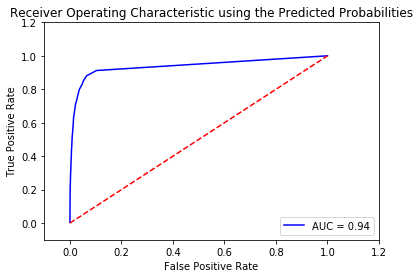

In [68]:
rf_probab_best=rf_best.predict_proba(X_test)

# using the bayesian probabilities to plot the ROC curve and to compute the AUC values

false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, rf_probab_best[:,1])
# may differ
print('The AUC: ',auc(false_positive_rate, true_positive_rate))
roc_auc=auc(false_positive_rate, true_positive_rate)




plt.title('Receiver Operating Characteristic using the Predicted Probabilities')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

### 3.1.3 Confusion Matrix 

In [69]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Recall metric in the testing dataset:  0.355276907001


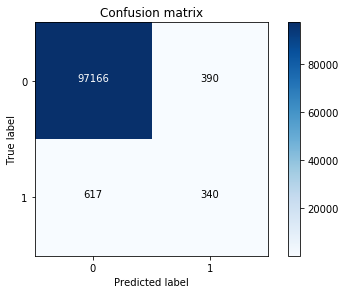

In [70]:
cnf_matrix = confusion_matrix(Y_test,rf_pred_best)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix,classes=class_names, title='Confusion matrix')

In [71]:
importances = rf_best.feature_importances_
indices = np.argsort(importances)[::-1]

x_cols=list(X_train.columns)
# Print the feature ranking
print("Feature ranking:")

for f in range(100):
    #print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    print("%d. feature %s : %f" % (f + 1, x_cols[indices[f]], importances[indices[f]]))

end=time.time()
print('Elapsed Time: ',end-start)
print(rf_best)

Feature ranking:
1. feature LAUFLEISTG : 0.095992
2. feature CAB_CONFIGURATION_FLOOR_F2E: FLOOR VAR. TUNNEL 170MM, FOR STOWAGE COMPART. LEFT : 0.023229
3. feature POWERTRAIN_ENGINE_SERIES_Z5D: OM 470 : 0.019247
4. feature CAB_CONFIGURATION_VERSION_F1E: L-CAB STREAMSPACE, 2.30 M, TUNNEL 170 MM : 0.018514
5. feature SEAG_14463 : 0.018474
6. feature POWERTRAIN_ENGINE_SERIES_Z5E: OM 471 : 0.017876
7. feature CAB_CONFIGURATION_CAB_SETUP_HEIGHT_F2N: CAB, 600 MM ATTACHMENT HEIGHT : 0.017590
8. feature CAB_CONFIGURATION_WIDTH_F2G: CAB WIDTH 2.30 M : 0.016411
9. feature POWERTRAIN_ENGINE_POWER_RATING_M2R: ENG. OM470,INLINE 6, 10.7 L, 315KW (428HP),2100 NM : 0.015070
10. feature SEAG_54905 : 0.012107
11. feature CAB_CONFIGURATION_CAB_SETUP_HEIGHT_F2P: CAB, 765 MM ATTACHMENT HEIGHT : 0.010383
12. feature CAB_CONFIGURATION_FLOOR_F2A: FLOOR VARIANT, FLAT FLOOR : 0.010340
13. feature POWERTRAIN_ENGINE_POWER_RATING_M3B: ENG. OM471,INLINE 6, 12.8 L, 330KW (449HP),2200 NM : 0.010231
14. feature SEAG_54

## 3.2) Training the Decision Tree Algorithm

In [73]:
from sklearn.feature_selection import SelectFromModel
model = SelectFromModel(rf_best, prefit=True)
X_train_red_rf_features = model.transform(X_train)
idxs_selected = model.get_support(indices=True)
print(X_train_red_rf_features.shape)

(229862, 684)


In [75]:
print(idxs_selected)

[   0    1    2    3    4    5    6    7    8    9   10   11   12   13   14
   15   16   17   18   19   20   21   22   23   24   25   26   27   28   29
   30   31   32   33   34   35   36   37   38   39   40   41   42   43   44
   45   46   47   48  377  422  443  444  445  446  447  450  451  452  453
  454  458  459  461  465  466  467  468  471  472  473  475  478  479  481
  482  486  487  488  489  490  493  494  496  499  500  501  502  503  507
  508  509  510  511  513  515  516  517  521  522  527  528  530  535  537
  538  542  543  544  545  549  550  551  552  555  556  558  559  563  564
  566  569  571  572  573  576  578  579  583  584  585  586  587  592  593
  594  598  599  601  605  606  613  614  619  620  627  636  641  643  646
  649  653  654  655  660  663  666  668  669  670  676  678  681  682  683
  684  685  686  688  689  690  691  692  695  696  697  698  699  702  703
  704  705  706  707  709  710  711  712  713  716  717  718  719  720  721
  722  723  

In [76]:
X_train_new=X_train.iloc[:,idxs_selected]

In [77]:
X_train_new.head()

,MODEL,LAUFLEISTG,ECHO LS 178,ECHO LS 2,ECHO LS 4,ECHO LS 89,PROMISE LS 10,PROMISE LS 100,PROMISE LS 101,PROMISE LS 102,PROMISE LS 102a,PROMISE LS 11,PROMISE LS 122a,PROMISE LS 123,PROMISE LS 123a,PROMISE LS 144,PROMISE LS 17,PROMISE LS 2,PROMISE LS 30,PROMISE LS 31,PROMISE LS 33,PROMISE LS 4,PROMISE LS 52,PROMISE LS 53,PROMISE LS 59,PROMISE LS 82,PROMISE LS 85,PROMISE LS 89,PRODDAT_MONTH_2015-01-01,PRODDAT_MONTH_2015-02-01,PRODDAT_MONTH_2015-03-01,PRODDAT_MONTH_2015-04-01,PRODDAT_MONTH_2015-05-01,PRODDAT_MONTH_2015-06-01,PRODDAT_MONTH_2015-07-01,PRODDAT_MONTH_2015-08-01,PRODDAT_MONTH_2015-09-01,PRODDAT_MONTH_2015-10-01,PRODDAT_MONTH_2015-11-01,PRODDAT_MONTH_2015-12-01,PRODDAT_MONTH_2016-01-01,PRODDAT_MONTH_2016-02-01,PRODDAT_MONTH_2016-03-01,PRODDAT_MONTH_2016-04-01,PRODDAT_MONTH_2016-05-01,PRODDAT_MONTH_2016-06-01,PRODDAT_MONTH_2016-07-01,PRODDAT_MONTH_2016-08-01,PRODDAT_MONTH_2016-09-01,REPDAT_2015-12-11,REPDAT_2016-01-25,REPDAT_2016-02-15,REPDAT_2016-02-16,REPDAT_2016-02-17,REPDAT_2016-02-18,REPDAT_2016-02-19,REPDAT_2016-02-22,REPDAT_2016-02-23,REPDAT_2016-02-24,REPDAT_2016-02-25,REPDAT_2016-02-26,REPDAT_2016-03-01,REPDAT_2016-03-02,REPDAT_2016-03-04,REPDAT_2016-03-08,REPDAT_2016-03-09,REPDAT_2016-03-10,REPDAT_2016-03-11,REPDAT_2016-03-14,REPDAT_2016-03-15,REPDAT_2016-03-16,REPDAT_2016-03-18,REPDAT_2016-03-21,REPDAT_2016-03-22,REPDAT_2016-03-24,REPDAT_2016-03-25,REPDAT_2016-03-29,REPDAT_2016-03-30,REPDAT_2016-03-31,REPDAT_2016-04-01,REPDAT_2016-04-02,REPDAT_2016-04-05,REPDAT_2016-04-06,REPDAT_2016-04-08,REPDAT_2016-04-11,REPDAT_2016-04-12,REPDAT_2016-04-13,REPDAT_2016-04-14,REPDAT_2016-04-15,REPDAT_2016-04-19,REPDAT_2016-04-20,REPDAT_2016-04-21,REPDAT_2016-04-22,REPDAT_2016-04-23,REPDAT_2016-04-25,REPDAT_2016-04-27,REPDAT_2016-04-28,REPDAT_2016-04-29,REPDAT_2016-05-03,REPDAT_2016-05-04,REPDAT_2016-05-09,REPDAT_2016-05-10,REPDAT_2016-05-12,REPDAT_2016-05-17,REPDAT_2016-05-19,REPDAT_2016-05-20,REPDAT_2016-05-24,REPDAT_2016-05-25,REPDAT_2016-05-26,REPDAT_2016-05-27,REPDAT_2016-05-31,REPDAT_2016-06-01,REPDAT_2016-06-02,REPDAT_2016-06-03,REPDAT_2016-06-06,REPDAT_2016-06-07,REPDAT_2016-06-09,REPDAT_2016-06-10,REPDAT_2016-06-14,REPDAT_2016-06-15,REPDAT_2016-06-17,REPDAT_2016-06-20,REPDAT_2016-06-22,REPDAT_2016-06-23,REPDAT_2016-06-24,REPDAT_2016-06-27,REPDAT_2016-06-29,REPDAT_2016-06-30,REPDAT_2016-07-04,REPDAT_2016-07-05,REPDAT_2016-07-06,REPDAT_2016-07-07,REPDAT_2016-07-08,REPDAT_2016-07-13,REPDAT_2016-07-14,REPDAT_2016-07-15,REPDAT_2016-07-19,REPDAT_2016-07-20,REPDAT_2016-07-22,REPDAT_2016-07-26,REPDAT_2016-07-27,REPDAT_2016-08-03,REPDAT_2016-08-04,REPDAT_2016-08-09,REPDAT_2016-08-10,REPDAT_2016-08-17,REPDAT_2016-08-26,REPDAT_2016-08-31,REPDAT_2016-09-02,REPDAT_2016-09-05,REPDAT_2016-09-08,REPDAT_2016-09-12,REPDAT_2016-09-13,REPDAT_2016-09-14,REPDAT_2016-09-19,REPDAT_2016-09-22,REPDAT_2016-09-25,REPDAT_2016-09-27,REPDAT_2016-09-28,REPDAT_2016-09-29,REPDAT_2016-10-05,REPDAT_2016-10-07,REPDAT_2016-10-10,REPDAT_2016-10-11,REPDAT_2016-10-12,REPDAT_2016-10-13,REPDAT_2016-10-14,REPDAT_2016-10-15,REPDAT_2016-10-17,REPDAT_2016-10-18,REPDAT_2016-10-19,REPDAT_2016-10-20,REPDAT_2016-10-21,REPDAT_2016-10-24,REPDAT_2016-10-25,REPDAT_2016-10-26,REPDAT_2016-10-27,REPDAT_2016-10-28,REPDAT_2016-10-31,REPDAT_2016-11-01,REPDAT_2016-11-02,REPDAT_2016-11-03,REPDAT_2016-11-04,REPDAT_2016-11-05,REPDAT_2016-11-07,REPDAT_2016-11-08,REPDAT_2016-11-09,REPDAT_2016-11-10,REPDAT_2016-11-11,REPDAT_2016-11-14,REPDAT_2016-11-15,REPDAT_2016-11-16,REPDAT_2016-11-17,REPDAT_2016-11-18,REPDAT_2016-11-19,REPDAT_2016-11-20,REPDAT_2016-11-21,REPDAT_2016-11-22,REPDAT_2016-11-23,REPDAT_2016-11-24,REPDAT_2016-11-25,REPDAT_2016-11-26,REPDAT_2016-11-28,REPDAT_2016-11-29,REPDAT_2016-11-30,REPDAT_2016-12-01,REPDAT_2016-12-02,REPDAT_2016-12-03,REPDAT_2016-12-05,REPDAT_2016-12-06,REPDAT_2016-12-07,REPDAT_2016-12-08,REPDAT_2016-12-09,REPDAT_2016-12-10,REPDAT_2016-12-12,REPDAT_2016-12-13,REPDAT_2016-12-14,REPDAT_2016-12-15,REPDAT_2016-12-16,REPDAT_2016-12-19,REPDAT_2016-12-20,R

In [84]:
cols=(X_train_new.columns)

In [79]:
# In[107]:

#X_train_new = X_train[idxs_selected]


# In[108]:

#cols=(X_train_new.columns)


# In[126]:

#del X_train_new


# In[109]:

X_test_red_rf_features=model.transform(X_test)
print(X_test_red_rf_features.shape)

(98513, 684)


In [80]:


def get_code(tree, feature_names):
        left      = tree.tree_.children_left
        right     = tree.tree_.children_right
        threshold = tree.tree_.threshold
        features  = [feature_names[i] for i in tree.tree_.feature]
        value = tree.tree_.value

        def recurse(left, right, threshold, features, node):
                if (threshold[node] != -2):
                        print ("if ( " + features[node] + " <= " + str(threshold[node]) + " ) {")
                        if left[node] != -1:
                                recurse (left, right, threshold, features,left[node])
                        print ("} else {")
                        if right[node] != -1:
                                recurse (left, right, threshold, features,right[node])
                        print ("}")
                else:
                        print ("return " + str(value[node]))

        recurse(left, right, threshold, features, 0)




In [81]:

from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='entropy',random_state=0)
dt=dt.fit(X_train_red_rf_features,Y_train)
dt_pred=dt.predict(X_test_red_rf_features)
print('Accuracy: ',accuracy_score(Y_test,dt_pred))


# In[111]:



Accuracy:  0.988905017612


Recall metric in the testing dataset:  0.412748171369


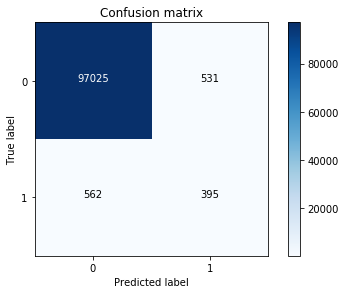

In [82]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test,dt_pred)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()


In [85]:
get_code(dt, cols)

if ( CAB_CONFIGURATION_FLOOR_F2E: FLOOR VAR. TUNNEL 170MM, FOR STOWAGE COMPART. LEFT <= 0.5 ) {
if ( LAUFLEISTG <= 183754.5 ) {
if ( POWERTRAIN_ENGINE_SERIES_Z5D: OM 470 <= 0.5 ) {
if ( EXHAUST_SYSTEM_EMISSION_STAGE_M5Z: ENGINE VERSION, EURO VI <= 0.5 ) {
if ( REPDAT_2016-02-24 <= 0.5 ) {
if ( REPDAT_2016-04-21 <= 0.5 ) {
if ( PRODDAT_MONTH_2015-07-01 <= 0.5 ) {
if ( REPDAT_2016-06-30 <= 0.5 ) {
if ( REPDAT_2016-08-17 <= 0.5 ) {
if ( REPDAT_2017-07-19 <= 0.5 ) {
if ( REPDAT_2017-05-23 <= 0.5 ) {
if ( REPDAT_2017-01-16 <= 0.5 ) {
return [[ 93016.      0.]]
} else {
if ( FUEL_SYSTEM_MAIN_FUEL_TANK_K2K: TANK, 490L, LEFT, 735 X 700 X 1170MM, ALU, STEP <= 0.5 ) {
return [[ 445.    0.]]
} else {
if ( PRODDAT_MONTH_2016-05-01 <= 0.5 ) {
return [[ 12.   0.]]
} else {
return [[ 0.  1.]]
}
}
}
} else {
if ( FIFTH_WHEEL_COUPLING_HEIGHT_Q4L: FIFTH WHEEL COUPLING HEIGHT = 190 MM <= 0.5 ) {
return [[ 256.    0.]]
} else {
if ( PRODDAT_MONTH_2016-08-01 <= 0.5 ) {
return [[ 2.  0.]]
} else {
return [[